## Get the historical weather data using open-meteo api (free)

In [1]:
import requests as r
import json

In [2]:
x = r.get("https://archive-api.open-meteo.com/v1/archive?latitude=28.46&longitude=77.03&start_date=1959-01-01&end_date=2023-01-08&hourly=temperature_2m")

In [5]:
with open('weather_data.json','w') as file:
    json.dump(x.json(), file)

In [6]:
data = x.json()

In [7]:
import pandas as pd
df  = pd.DataFrame({'Time' : data['hourly']['time'],
                    'Temperature': data['hourly']['temperature_2m']})

In [8]:
# change time to date
df['Time'] = df['Time'].apply(lambda x: x.split('T')[0])

In [9]:
df = df.dropna()
df

,Time,Temperature
0,1959-01-01,7.2
1,1959-01-01,7.0
2,1959-01-01,6.9
3,1959-01-01,8.4
4,1959-01-01,11.8
...,...,...
561211,2023-01-08,9.5
561212,2023-01-08,9.0
561213,2023-01-08,8.2
561214,2023-01-08,7.5


In [10]:
df1 = df.groupby('Time').mean().reset_index()
df1 = df1.rename(columns={'Time':'Date'}) # rename column
df1

,Date,Temperature
0,1959-01-01,11.572000
1,1959-01-02,13.479167
2,1959-01-03,16.800000
3,1959-01-04,17.516667
4,1959-01-05,14.237500
...,...,...
23378,2023-01-04,10.491667
23379,2023-01-05,9.191667
23380,2023-01-06,7.525000
23381,2023-01-07,9.100000


In [11]:
# Only Non Null Value
df1 = df1[df1.notna()['Temperature']]

In [37]:
# Convert the date column to datetime
df1['date'] = pd.to_datetime(df1['Date'])

# Extract the year, month, and day into separate columns
df1['year'] = df1['date'].dt.year
df1['month'] = df1['date'].dt.month 
df1['day'] = df1['date'].dt.day

df1['month-day'] = df1.date.dt.strftime('%m-%d')
df1

,Date,Temperature,date,year,month,day,month-day
0,1959-01-01,11.572000,1959-01-01,1959,1,1,01-01
1,1959-01-02,13.479167,1959-01-02,1959,1,2,01-02
2,1959-01-03,16.800000,1959-01-03,1959,1,3,01-03
3,1959-01-04,17.516667,1959-01-04,1959,1,4,01-04
4,1959-01-05,14.237500,1959-01-05,1959,1,5,01-05
...,...,...,...,...,...,...,...
23378,2023-01-04,10.491667,2023-01-04,2023,1,4,01-04
23379,2023-01-05,9.191667,2023-01-05,2023,1,5,01-05
23380,2023-01-06,7.525000,2023-01-06,2023,1,6,01-06
23381,2023-01-07,9.100000,2023-01-07,2023,1,7,01-07


In [38]:
df2 = df1.pivot_table(index=['year' ], columns=['month','day'],values=['Temperature'])
df2=df2.drop(2023) # delete 2023 
df2

Temperature                                                         \
month          1                                                           
day            1          2          3          4          5          6    
year                                                                       
1959    11.572000  13.479167  16.800000  17.516667  14.237500  12.120833   
1960    15.900000  16.908333  15.983333  14.675000  14.325000  14.358333   
1961    13.791667  13.041667  11.879167  12.170833  11.187500  11.495833   
1962    12.666667  12.104167  11.462500  12.341667  12.850000  13.212500   
1963    10.583333  11.629167  11.458333  10.720833  10.704167  11.516667   
...           ...        ...        ...        ...        ...        ...   
2018    13.483333  13.200000  12.779167  12.787500  13.191667  12.945833   
2019    13.691667  14.841667  13.966667  13.687500  14.858333  13.587500   
2020    10.725000  14.012500  14.604167  13.970833  14.495833  14.283333   
2021    12.716667  15.170833  17.195833  17.445833  18.229167  17.383333   
2022    12.229167  12.270833  13.833333  15.450000  13.666667  15.429167   

                                                   ...                        \
month                                              ...         12              
day           7          8          9          10  ...         22         23   
year                                               ...                         
1959   11.425000  11.350000  11.945833  11.412500  ...  13.075000  13.554167   
1960   14.437500  14.237500  14.012500  14.212500  ...  14.791667  15.466667   
1961   11.491667  12.450000  12.812500  13.008333  ...   9.275000  10.216667   
1962   12.987500  13.195833  12.783333  13.291667  ...  13.308333  13.429167   
1963   11.908333  12.466667  13.525000  14.000000  ...  12.462500  12.345833   
...          ...        ...        ...        ...  ...        ...        ...   
2018   12.750000  12.616667  12.791667  14.004167  ...  12.691667  13.179167   
2019   13.020833  13.304167  13.287500  12.466667  ...  12.833333  12.025000   
2020   14.979167  12.158333  10.066667  10.750000  ...  14.595833  14.408333   
2021   14.083333  13.766667  15.133333  11.604167  ...  13.879167  14.925000   
2022   16.462500  15.700000  13.175000  11.537500  ...  12.595833  13.112500   

                                                                         \
month                                                                     
day           24         25         26         27         28         29   
year                                                                      
1959   13.479167  12.950000  12.591667  14.220833  14.645833  13.620833   
1960   15.683333  15.450000  15.808333  16.612500  17.291667  19.183333   
1961   10.233333   9.912500  10.662500  11.370833  11.337500  11.816667   
1962   13.537500  13.762500  15.929167  15.608333  13.716667  10.870833   
1963   12.712500  13.233333  13.912500  12.241667  13.820833  13.383333   
...          ...        ...        ...        ...        ...        ...   
2018   13.200000  12.504167  12.054167  12.966667  11.987500  12.900000   
2019    9.550000   9.641667   9.450000   8.383333   7.916667   7.445833   
2020   14.266667  13.604167  13.845833  15.100000  11.779167  10.687500   
2021   15.491667  15.333333  15.545833  15.004167  13.833333  12.662500   
2022   12.554167  11.037500  11.604167  12.662500  14.083333  15.354167   

                             
month                        
day           30         31  
year                         
1959   13.616667  13.925000  
1960   18.125000  15.625000  
1961   12.820833  12.566667  
1962   10.537500  10.204167  
1963   14.333333  12.466667  
...          ...        ...  
2018   13.250000  13.608333  
2019    7.037500   7.075000  
2020   10.279167  10.379167  
2021   11.225000  10.979167  
2022   15.458333  13.183333  

[64 rows x 366 columns]

# Plot a HeatMap

In [26]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns


In [258]:
# Setting X-Ticks
single_year = df1[df1['year']==2020]
tick_bool = list(single_year['day']==1)

# 1st date of each month
first_date = []
for i in range(366):
    if tick_bool[i]:
        first_date.append(i)
first_date     

[0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335]

In [259]:
import calendar
month_name = list(calendar.month_name)[1:]

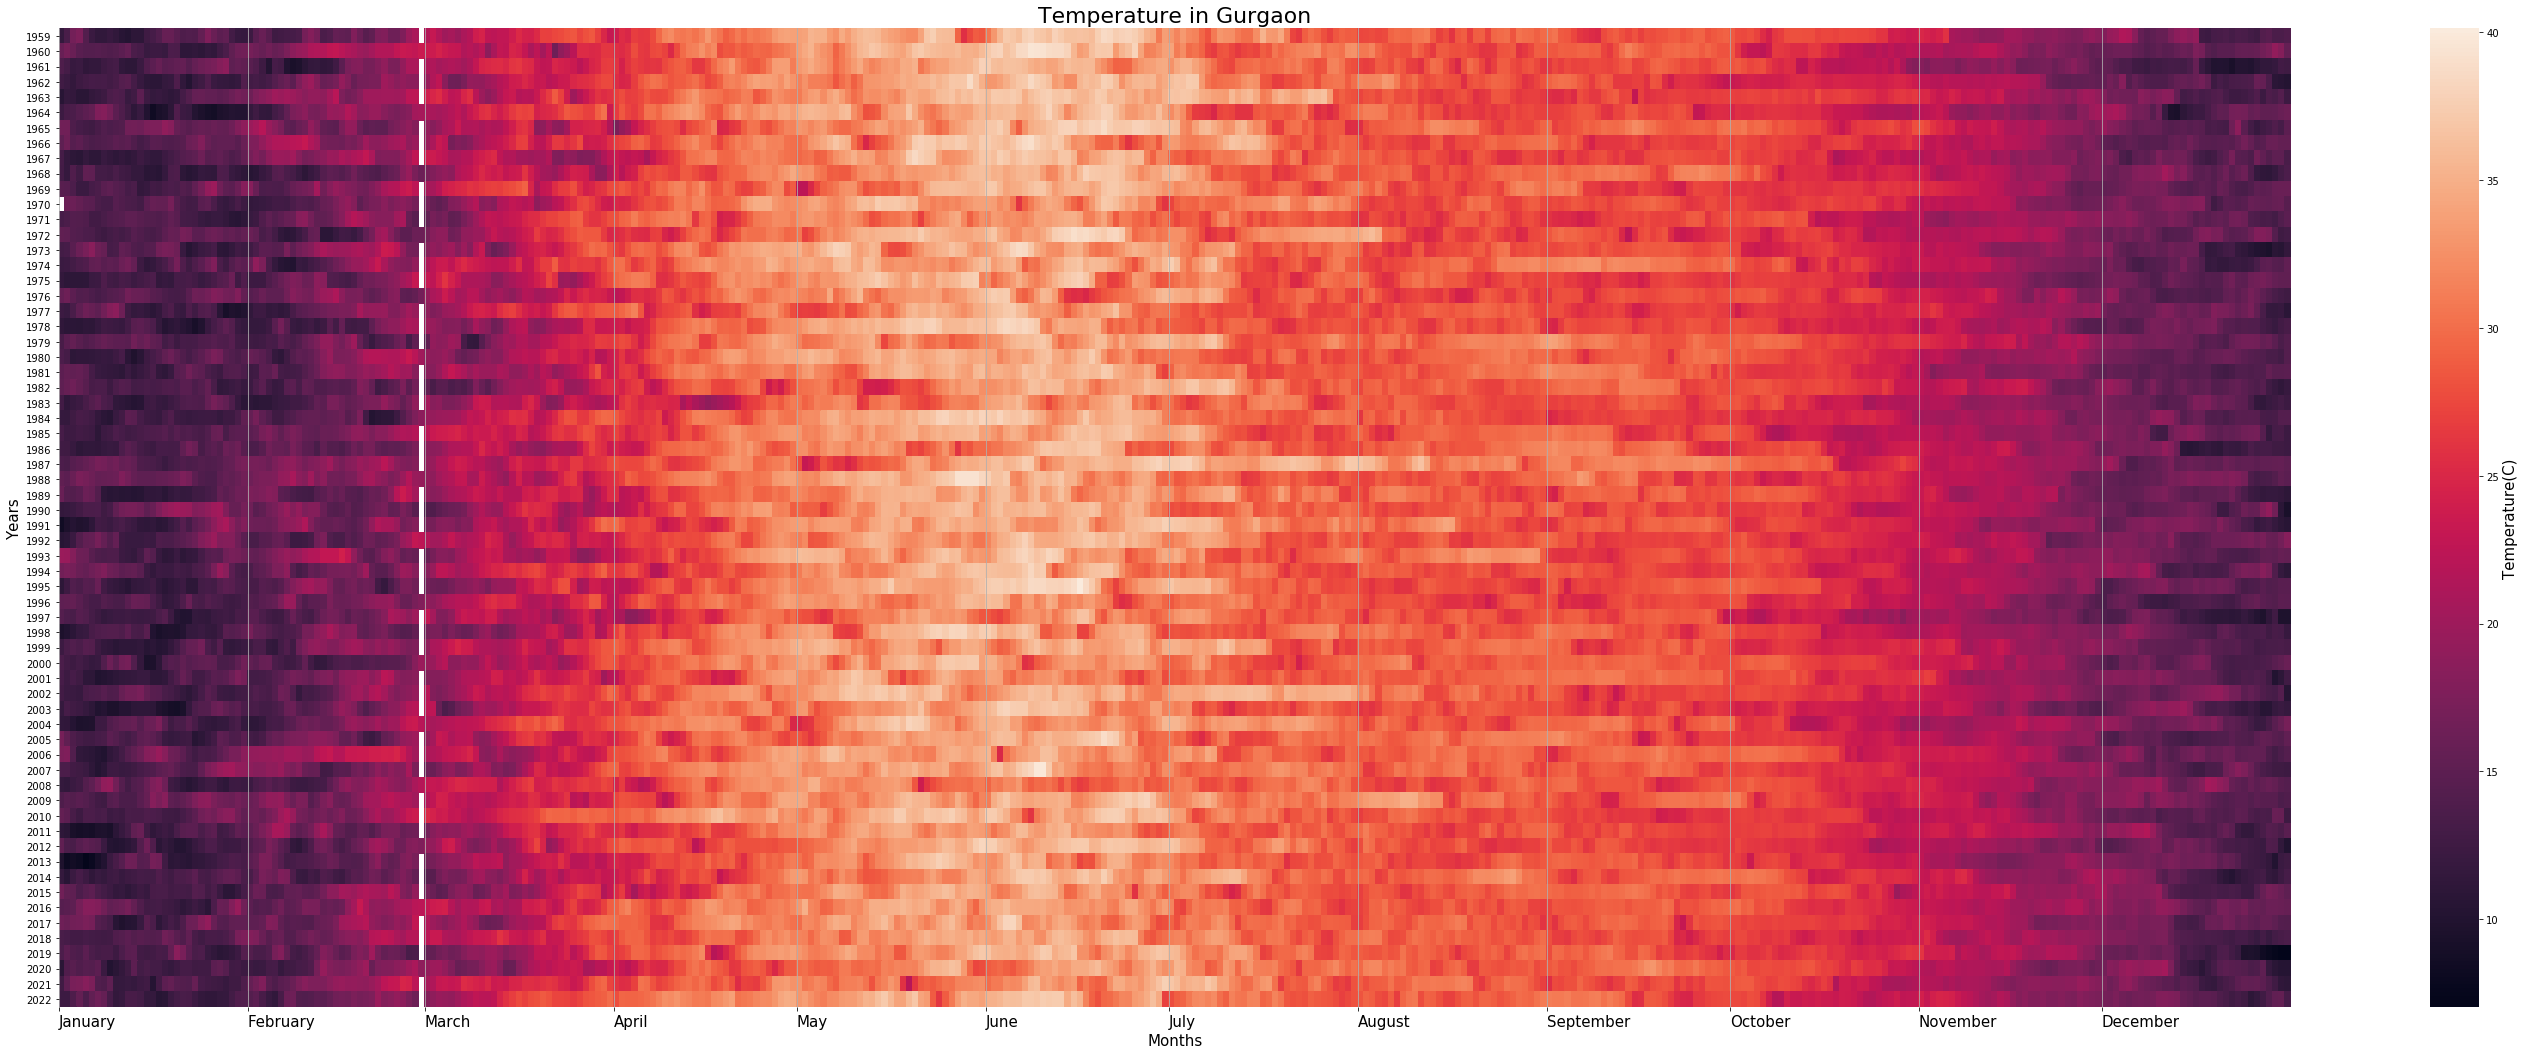

In [271]:
fig = plt.figure(figsize=(50,18))
# fig = plt.figure(figsize=(12,14))


ax = sns.heatmap(df2,cbar_kws={'label': 'Temperature(C)'})
# increase font size of cbar
ax.figure.axes[-1].set_ylabel('Temperature(C)',size=15)

# set ticks
ax.set_xticks(first_date)
# ax.set_xticklabels(month_name, fontdict={'fontsize':9},rotation=25)
ax.set_xticklabels(month_name, fontdict={'fontsize':15}, rotation=0, ha='left') # landscape


# plt.title("Temperature in Gurgaon", fontsize=14)
plt.title("Temperature in Gurgaon", fontsize=22) # landscape
# plt.ylabel('Years') 
plt.ylabel('Years', fontsize=15) 

# plt.xlabel('Months')
plt.xlabel('Months', fontsize=15)
plt.grid(axis='x')

ax.figure.savefig('60_years_weather_heatmap3', dpi=300, bbox_inches="tight")
